<a href="https://colab.research.google.com/github/dimas1625/PCVK_GANJIL_2025/blob/main/Weeky7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MODUL 7 – Filter Spasial Low Pass Filter, High Pass Filter, Point Detection, Line Detection, Edge Detection

NAMA: Muhammad Dimas Ajie Nugroho
NO: 20
KELAS: 3A

#PRAKTIKUM FILTER



1. Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa
menggunakan library atau metode konvolusi dari OpenCV.

In [2]:
import numpy as np
import cv2
from google.colab import drive
drive.mount('/content/drive')


def convolution(image, kernel, padding=0, stride=1):
    # Ubah kernel agar sesuai dengan definisi konvolusi (dibalik)
    kernel = np.flipud(np.fliplr(kernel))

    # Ambil ukuran gambar dan kernel
    xKernShape, yKernShape = kernel.shape
    xImgShape, yImgShape = image.shape

    # Hitung ukuran output
    xOutput = int(((xImgShape - xKernShape + 2*padding) / stride) + 1)
    yOutput = int(((yImgShape - yKernShape + 2*padding) / stride) + 1)
    output = np.zeros((xOutput, yOutput))

    # Tambahkan padding jika ada
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[padding:-padding, padding:-padding] = image
    else:
        imagePadded = image

    # Proses konvolusi
    for y in range(0, yOutput):
        for x in range(0, xOutput):
            region = imagePadded[x*stride:x*stride+xKernShape, y*stride:y*stride+yKernShape]
            output[x, y] = (kernel * region).sum()

    return output


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Berikut merupakan langkah-langkah yang dapat dilakukan:

a. Buat notebook baru pada google colab, dan beri nama Week7.ipynb. Simpan Salinan  pada akun github seperti pada modul sebelumnya.

b. Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan

c. Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi.
Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan
padding.

d. Load citra yang akan diproses dan ubah menjadi citra keabuan

e. Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening
sebagai berikut:

f.
Memanggil fungsi konvolusi yang telah dibuat sebelumnya, dan menampilkan hasil
konvolusinya:

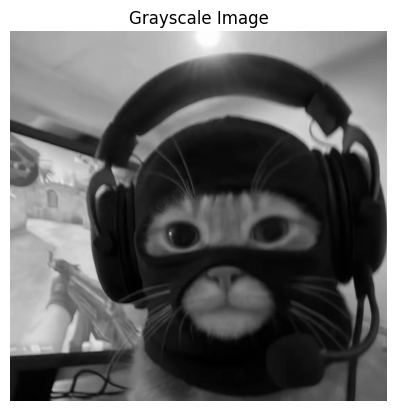

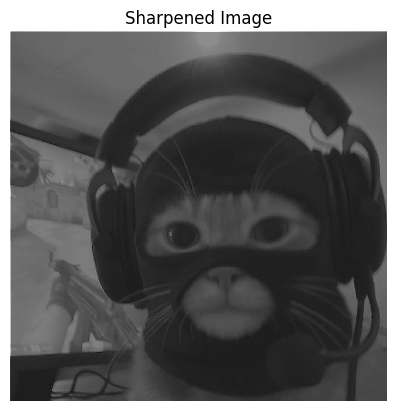

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image
img = cv2.imread('/content/drive/MyDrive/cat1.jpg')

# Check if image was loaded successfully
if img is None:
    print("Error: Image not loaded. Please check the file path.")
else:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    plt.imshow(gray, cmap='gray')
    plt.title("Grayscale Image")
    plt.axis("off")
    plt.show()

    kernel_sharpen = np.array([[0, -1, 0],
                               [-1, 5, -1],
                               [0, -1, 0]])

    output_sharpen = convolution(gray, kernel_sharpen, 1,2)
    plt.imshow(output_sharpen, cmap='gray')
    plt.title("Sharpened Image")
    plt.axis("off")
    plt.show()

3. Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter
berikut:

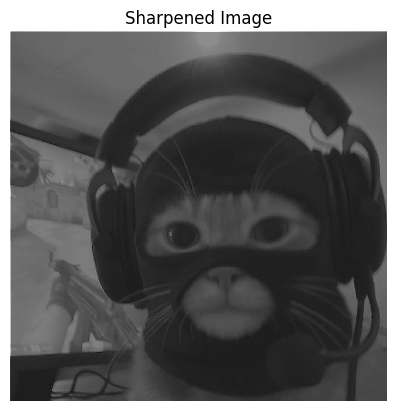

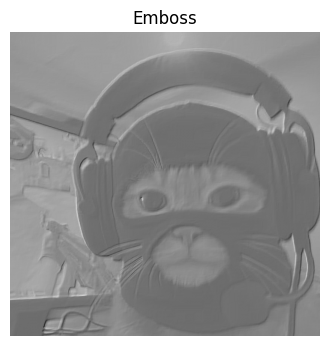

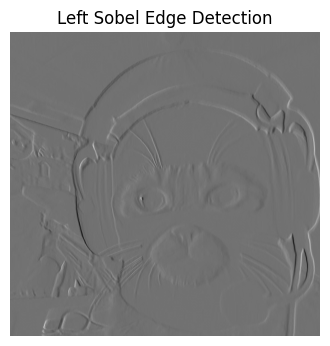

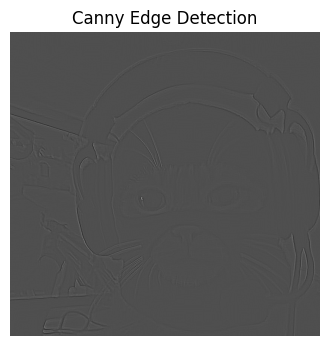

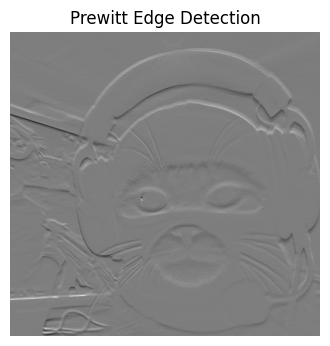

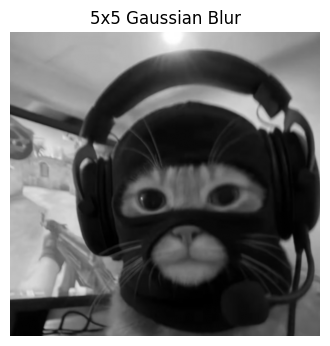

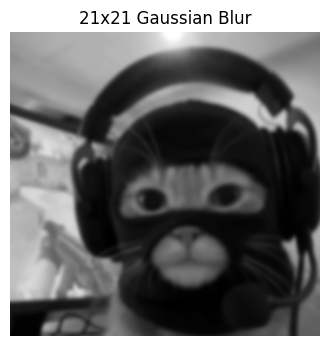

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

# Fungsi konvolusi manual (dari nomor 1)
def convolution(image, kernel, padding=0, stride=1):
    kernel = np.flipud(np.fliplr(kernel))  # flip kernel
    xKernShape, yKernShape = kernel.shape
    xImgShape, yImgShape = image.shape
    xOutput = int(((xImgShape - xKernShape + 2*padding) / stride) + 1)
    yOutput = int(((yImgShape - yKernShape + 2*padding) / stride) + 1)
    output = np.zeros((xOutput, yOutput))

    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[padding:-padding, padding:-padding] = image
    else:
        imagePadded = image

    for y in range(0, yOutput):
        for x in range(0, xOutput):
            region = imagePadded[x*stride:x*stride+xKernShape, y*stride:y*stride+yKernShape]
            output[x, y] = (kernel * region).sum()

    return output

# Load gambar
img = cv2.imread("/content/drive/MyDrive/cat1.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Daftar kernel sesuai modul
kernels = {
    "Emboss": np.array([[-2,-1,0],
                        [-1, 1,1],
                        [ 0, 1,2]]),

    "Left Sobel Edge Detection": np.array([[ 1, 0,-1],
                                           [ 2, 0,-2],
                                           [ 1, 0,-1]]),

    "Canny Edge Detection": np.array([[-1,-1,-1],
                                      [-1, 8,-1],
                                      [-1,-1,-1]]),

    "Prewitt Edge Detection": np.array([[-1,-1,-1],
                                        [ 0, 0, 0],
                                        [ 1, 1, 1]]),

    # Gaussian Blur 5x5
    "5x5 Gaussian Blur": (1/256) * np.array([[ 1,  4,  6,  4, 1],
                                             [ 4, 16, 24, 16, 4],
                                             [ 6, 24, 36, 24, 6],
                                             [ 4, 16, 24, 16, 4],
                                             [ 1,  4,  6,  4, 1]])
}

# Gaussian 21x21 dengan fungsi OpenCV
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv2.getGaussianKernel(kernel_size, sigma)
kernels["21x21 Gaussian Blur"] = gaussian_kernel @ gaussian_kernel.T

kernel_sharpen = np.array([[0, -1, 0],
                            [-1, 5, -1],
                            [0, -1, 0]])

output_sharpen = convolution(gray, kernel_sharpen, 1,2)
plt.imshow(output_sharpen, cmap='gray')
plt.title("Sharpened Image")
plt.axis("off")
plt.show()

# Jalankan semua filter
for name, kernel in kernels.items():
    result = convolution(gray, kernel)
    plt.figure(figsize=(4,4))
    plt.imshow(result, cmap='gray')
    plt.title(name)
    plt.axis("off")
    plt.show()
